## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

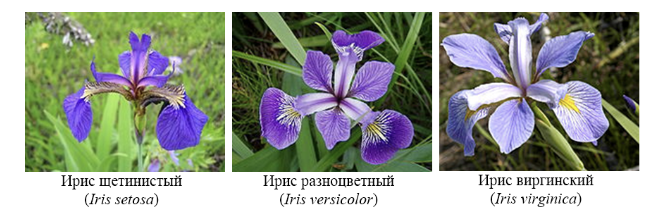

Импортируем необходимые библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [7]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины и ширины двух типов лепестков Ириса: sepal и petal.
Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 
Наша задача заключается в том, чтобы по имеющимся данным найти зависимости между размерами лепестков и сортами Ирисов.

In [8]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [9]:
iris_df = pd.DataFrame(iris.data)

In [10]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
iris_df.shape

(150, 6)

In [13]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [14]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

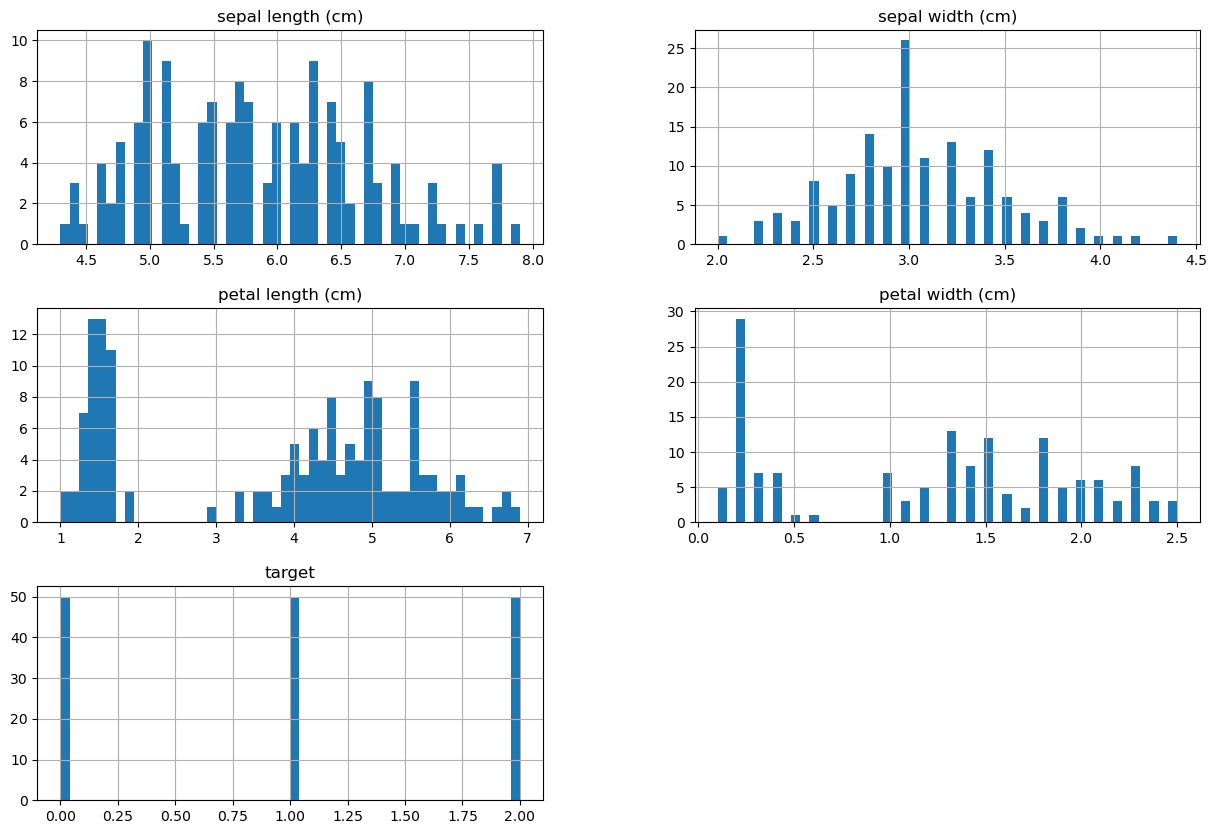

In [17]:
iris_df.hist(figsize = (15,10), bins = 50);

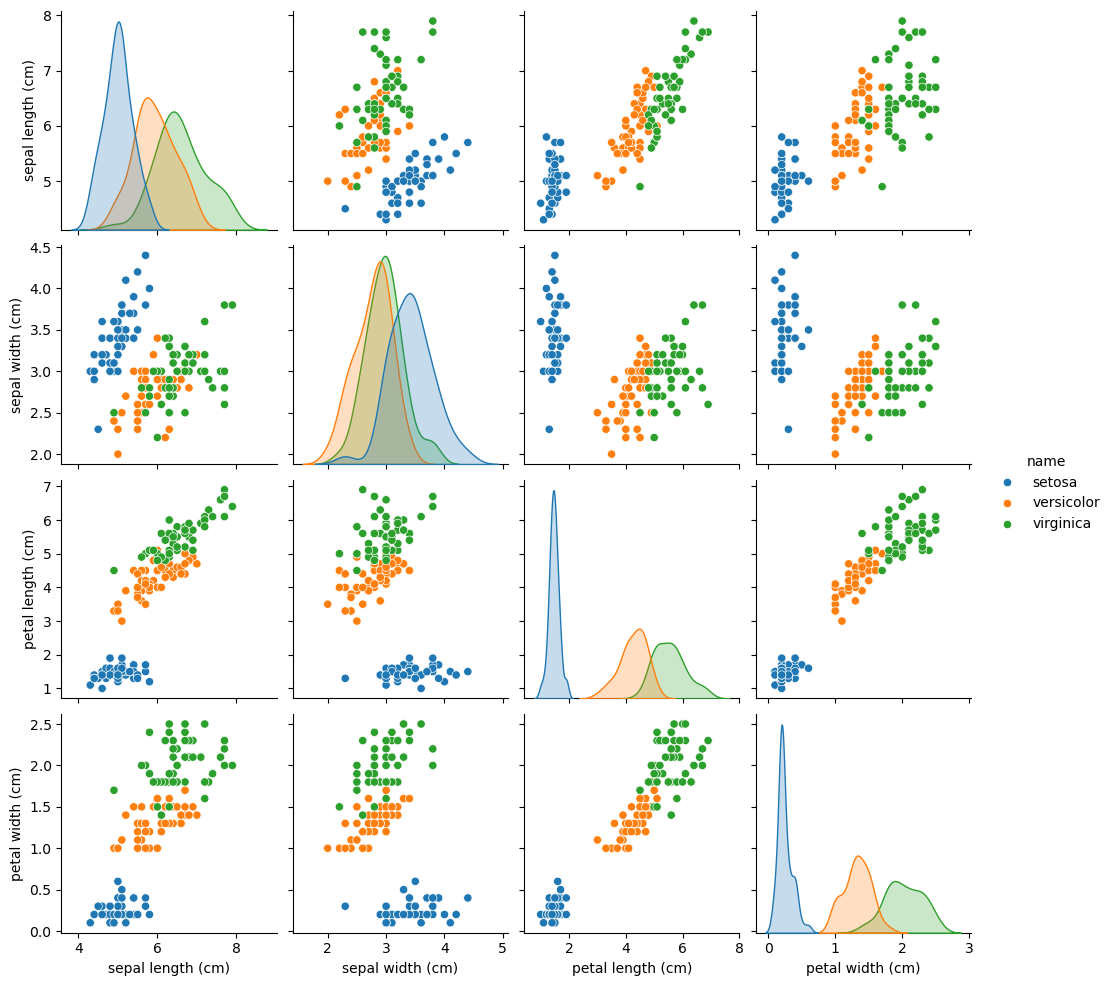

In [18]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Переменные «petal width (cm)» и «petal length (cm)» демонстрируют сильную корреляцию — точки расположены вдоль четко выраженной линии. Это позволяет использовать эти признаки для построения классификации, т.к точки, соответствующие разным классам, сгруппированы по цвету. В отличие от этого, переменные «sepal width (cm)» и «sepal length (cm)» не подходят для качественной классификации, поскольку точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

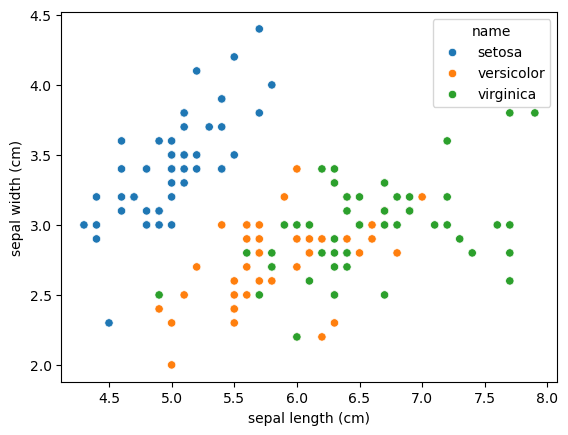

In [19]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

In [20]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

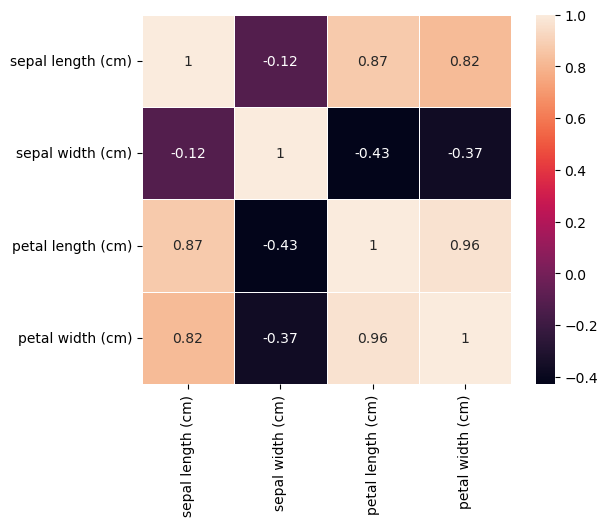

In [21]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

С помощью тепловой карты мы удостоверяемся в том, что между переменными «petal length (cm)» и «petal width (cm)» присутствует сильная зависимость (0.96), а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Modelling

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'name'],
      dtype='object')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.33, 
                                                      random_state=42)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

### KNeighborsClassifier (Классификация ближайших соседей)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [30]:
# Другой способ для вычисления метрики
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.98

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Confusion Matrix

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

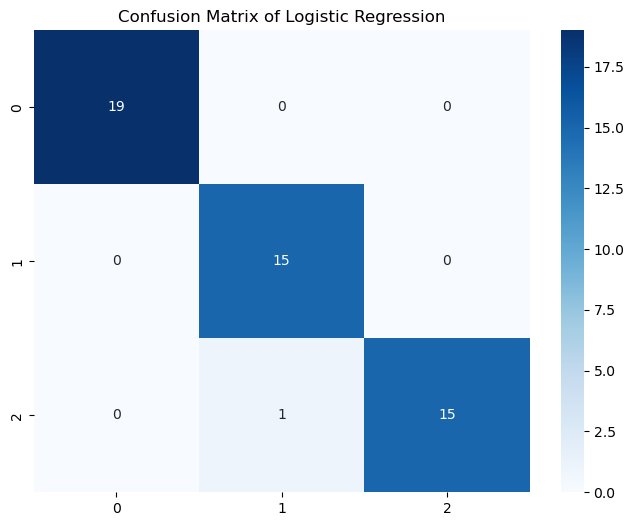

In [33]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

### Метрики многоклассовой классификации

In [34]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.98
0.98
0.98


In [35]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9791666666666666
0.9791666666666666
0.978494623655914


In [36]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.98125
0.98
0.98


### Кроссвалидация

In [37]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
                                                    

In [38]:
y = iris_df['target']

In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [40]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score:  0.9733333333333334


### Настройка гиперпараметров

In [41]:
# Hyperparameter tuning
param_grid = {'n_neighbors': [1,2,3,4,5]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 1}


In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [49]:
gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred_gnb = gnb.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_gnb)

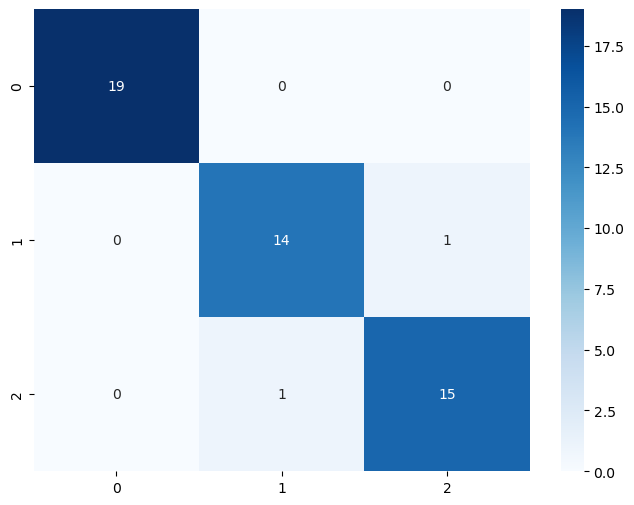

In [54]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

# Random Forest Classifier

In [55]:
rfc = RandomForestClassifier()

In [56]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 42)

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [58]:
y_pred_rfc = rfc.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



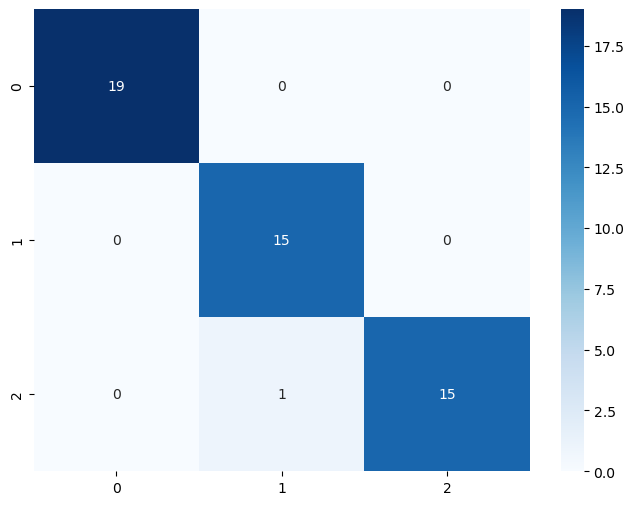

In [60]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

# Logistic Regression

In [61]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [63]:
y_pred_lr = lr.predict(X_test)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [65]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

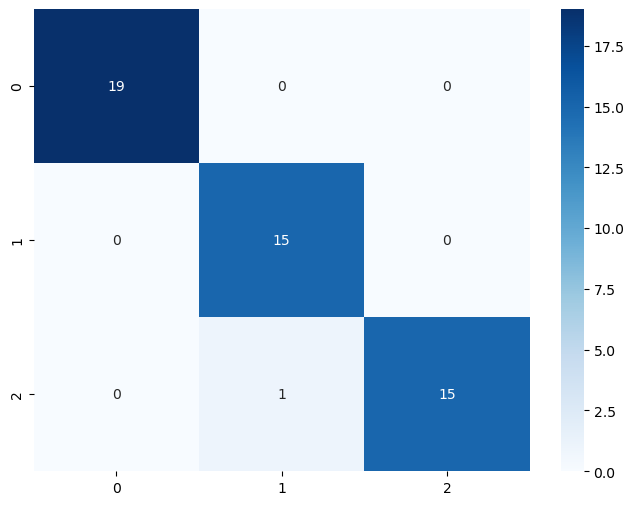

In [66]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

### Сравнение моделей

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log = pd.DataFrame()

log["Classifier"] = classifiers
log["Accuracy"] = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_lr)]

log

,Classifier,Accuracy
0,KNeighborsClassifier,0.98
1,Gaussian Naive Bayes,0.96
2,Random Forest Classifier,0.98
3,Logistic Regression,0.98


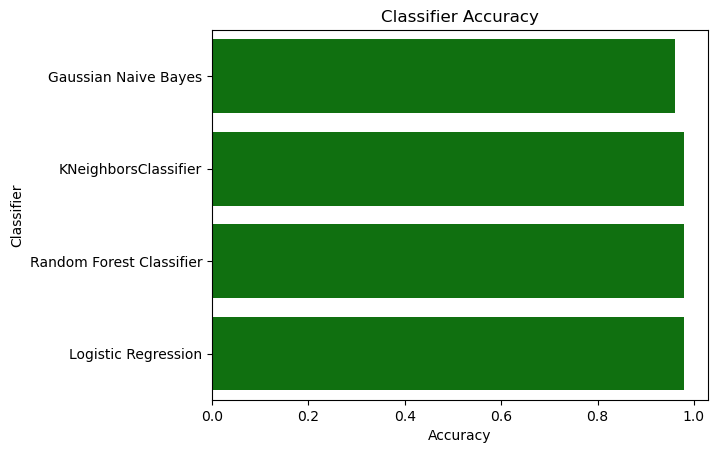

In [68]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="green");

# Вывод

Был загружен набор данных Iris, входящий в модуль datasets библиотеки scikit-learn. Мы ознакомились с данными и преобразовали набор в датасет со следующими столбцами: 'sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'. Далее посмотрели описательную статистику, и на тепловой карте заметили, что между переменными «petal length (cm)» и «petal width (cm)» присутствует сильная зависимость (0.96), а между «sepal width (cm)» и «sepal length (cm)» - слабая. После этого приступили к обучению моделей с помощью целевой переменной 'target'.

Таким образом, все модели показали +- одинаковые результаты, а единственный, кто немного уступал - Gaussian Naive Bayes..

# Кластеризация

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [70]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [71]:
iris_df.drop(labels="target", axis=1, inplace=True)

In [72]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   name               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
X = iris.data  # Признаки
y = iris.target  # Истинные метки классов
feature_names = iris.feature_names  # Названия признаков

In [74]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
# Функция для расчета метрик
def evaluate_clustering(X, labels, true_labels=None):
    metrics = {
        'Silhouette Score': silhouette_score(X, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(X, labels),
        'Davies-Bouldin Index': davies_bouldin_score(X, labels),
    }
    if true_labels is not None:
        metrics['Adjusted Rand Index (ARI)'] = adjusted_rand_score(true_labels, labels)
    return metrics

# K-Means Clustering

In [76]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

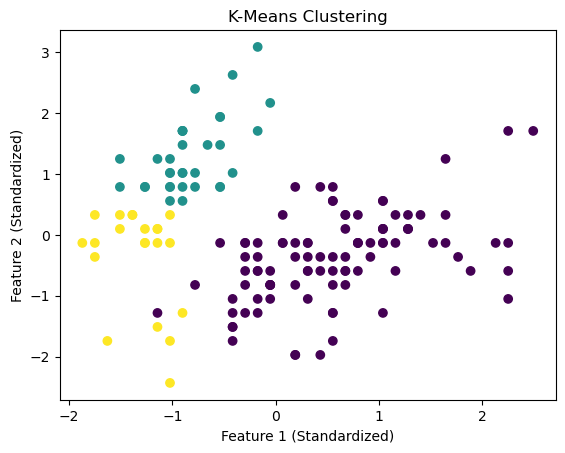

In [77]:
# Визуализация K-Means
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

In [78]:
# Метрики для K-Means
kmeans_metrics = evaluate_clustering(X_scaled, kmeans_labels, y)
kmeans_metrics

{'Silhouette Score': 0.4798814508199817,
 'Calinski-Harabasz Index': 157.36015312192248,
 'Davies-Bouldin Index': 0.7893630242997912,
 'Adjusted Rand Index (ARI)': 0.432804702527474}

In [79]:
iris_df['cluster'] = pd.Series(kmeans_labels)


In [80]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,1


In [81]:
iris_df[iris_df['cluster']==0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,cluster
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


**Особенности:**

Объекты versicolor в этом кластере имеют меньшие значения длины и ширины лепестков по сравнению с virginica.

Объекты virginica в этом кластере имеют более высокие значения длины и ширины лепестков, но всё же перекрываются с versicolor.

In [82]:
iris_df[iris_df['cluster']==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,cluster
0,5.1,3.5,1.4,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
10,5.4,3.7,1.5,0.2,setosa,1
11,4.8,3.4,1.6,0.2,setosa,1
14,5.8,4.0,1.2,0.2,setosa,1
15,5.7,4.4,1.5,0.4,setosa,1
16,5.4,3.9,1.3,0.4,setosa,1


Все объекты в кластере 1 принадлежат классу setosa, что указывает на высокую чистоту кластера.

**Характерные признаки:**

У объектов setosa значительно меньшие значения длины и ширины лепестков по сравнению с versicolor и virginica.

Значения длины и ширины чашелистиков также меньше, чем у других классов, но не так сильно отличаются.

In [83]:
iris_df[iris_df['cluster']==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,cluster
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
8,4.4,2.9,1.4,0.2,setosa,2
9,4.9,3.1,1.5,0.1,setosa,2
12,4.8,3.0,1.4,0.1,setosa,2
13,4.3,3.0,1.1,0.1,setosa,2
25,5.0,3.0,1.6,0.2,setosa,2
29,4.7,3.2,1.6,0.2,setosa,2
30,4.8,3.1,1.6,0.2,setosa,2


setosa:

Маленькие значения длины и ширины лепестков.

Значения длины и ширины чашелистиков также меньше, чем у versicolor.

versicolor:

Объекты versicolor в этом кластере имеют меньшие значения длины и ширины лепестков по сравнению с типичными versicolor, что делает их похожими на setosa.

# Дендрограмма

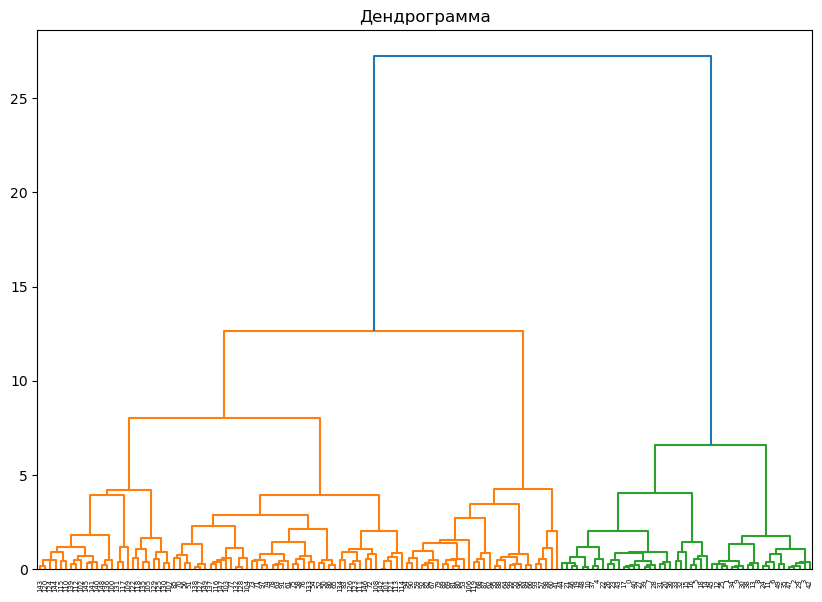

In [84]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендрограмма')
plt.show()

# Agglomerative Clustering by Ward

In [85]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

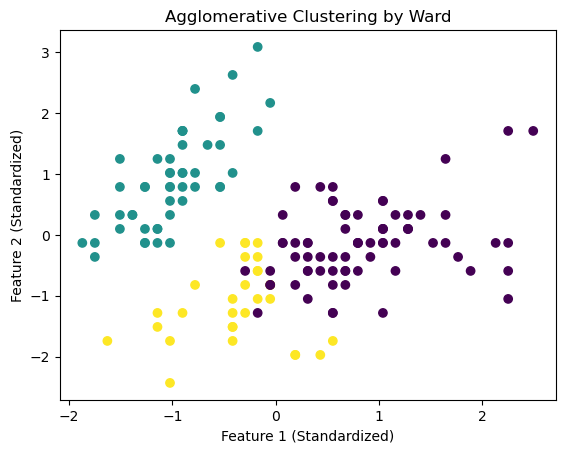

In [86]:
# Визуализация Agglomerative Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering by Ward')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

In [87]:
# Метрики для Agglomerative Clustering
agglo_metrics = evaluate_clustering(X_scaled, agglo_labels, y)
agglo_metrics

{'Silhouette Score': 0.4466890410285909,
 'Calinski-Harabasz Index': 222.71916382215363,
 'Davies-Bouldin Index': 0.8034665302876753,
 'Adjusted Rand Index (ARI)': 0.6153229932145449}

Agglomerative Clustering показывает лучшее разделение кластеров (высокий Calinski-Harabasz Index) и лучше воспроизводит истинную структуру данных (высокий ARI).

K-Means демонстрирует немного более компактные кластеры (низкий Davies-Bouldin Index) и лучшее разделение объектов внутри кластеров (высокий Silhouette Score).

Соответствие истинным меткам:

Agglomerative Clustering значительно лучше воспроизводит истинные метки (ARI = 0.615 против 0.433 у K-Means). Т.е Agglomerative Clustering лучше справляется с разделением классов.

# DBSCAN Clustering

In [88]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

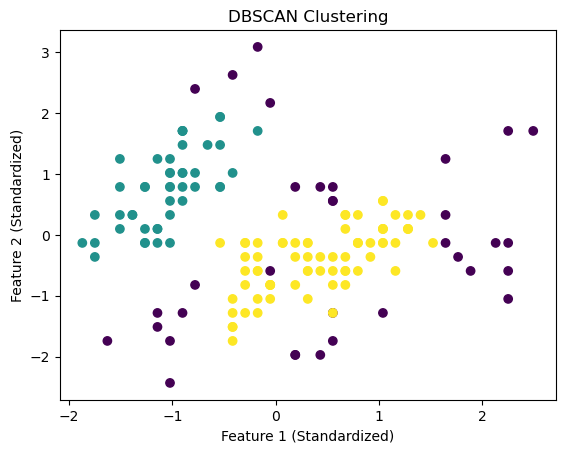

In [89]:
# Визуализация DBSCAN
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

In [90]:
# Метрики для DBSCAN
dbscan_metrics = evaluate_clustering(X_scaled, dbscan_labels, y)
dbscan_metrics

{'Silhouette Score': 0.35651648142700726,
 'Calinski-Harabasz Index': 84.51033032484679,
 'Davies-Bouldin Index': 7.124056948818214,
 'Adjusted Rand Index (ARI)': 0.4420986685885924}

DBSCAN значительно уступает по всем метрикам, что указывает на менее четкое разделение кластеров и хуже воспроизведение истинной структуры данных.

# PCA для уменьшения размерности

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

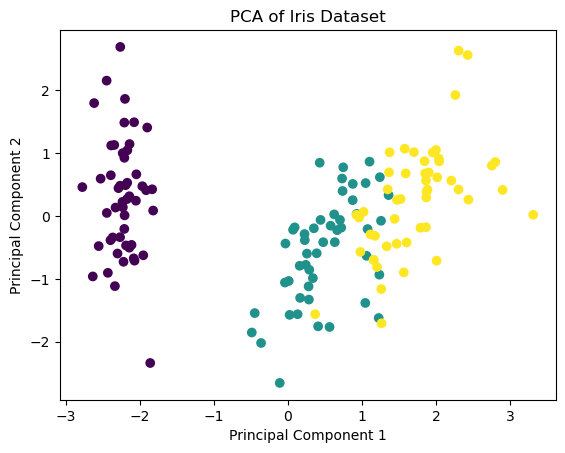

In [92]:
# Визуализация PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Spectral Clustering

In [93]:
spectral = SpectralClustering(n_clusters=3, random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

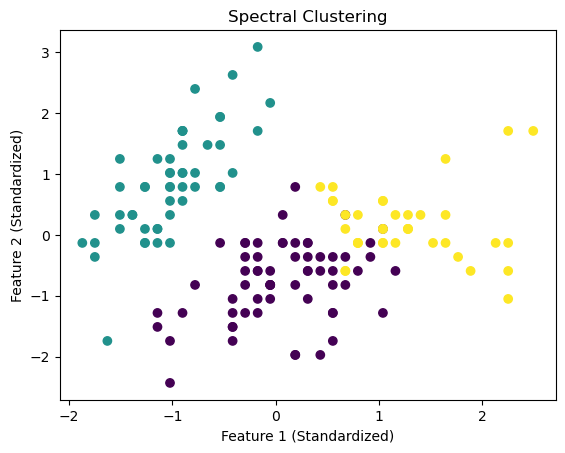

In [94]:
# Визуализация Spectral Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

In [95]:
# Метрики для Spectral Clustering
spectral_metrics = evaluate_clustering(X_scaled, spectral_labels, y)
spectral_metrics

{'Silhouette Score': 0.46297611543567124,
 'Calinski-Harabasz Index': 236.88887497963194,
 'Davies-Bouldin Index': 0.8257164229908825,
 'Adjusted Rand Index (ARI)': 0.6451422031981431}

Spectral Clustering лучше справляется с разделением классов и воспроизведением истинной структуры данных.

# Сравнение всех кластеров

Text(0.5, 1.0, 'PCA of Iris Dataset')

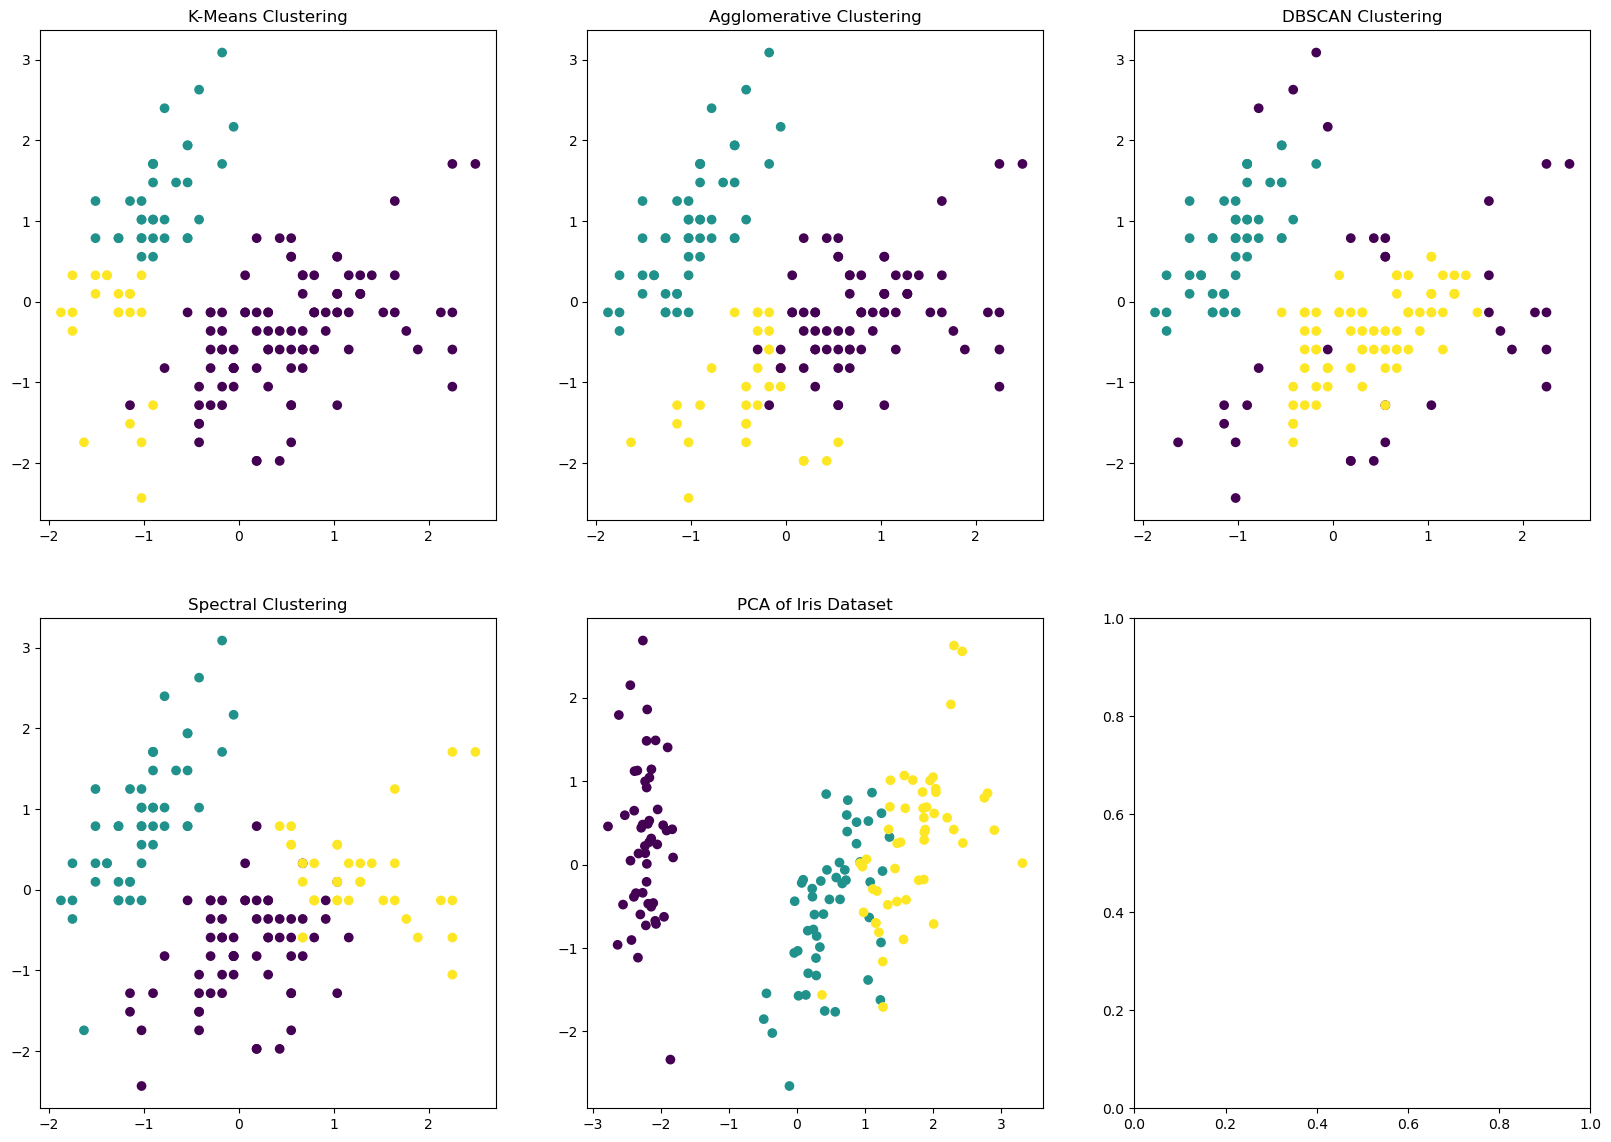

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes[0, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[0, 0].set_title('K-Means Clustering')
# Agglomerative Clustering
axes[0, 1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis')
axes[0, 1].set_title('Agglomerative Clustering')

# DBSCAN
axes[0, 2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[0, 2].set_title('DBSCAN Clustering')

# Spectral Clustering
axes[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis')
axes[1, 0].set_title('Spectral Clustering')

# PCA
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[1, 1].set_title('PCA of Iris Dataset')

In [97]:
metrics_table = pd.DataFrame({
    'K-Means': kmeans_metrics,
    'Agglomerative Clustering': agglo_metrics,
    'DBSCAN': dbscan_metrics,
    'Spectral Clustering': spectral_metrics
})

# Транспонирование таблицы для удобства
metrics_table = metrics_table.T

# Вывод таблицы
print("Сравнение метрик кластеризации:")
print(metrics_table)

Сравнение метрик кластеризации:
                          Silhouette Score  Calinski-Harabasz Index  \
K-Means                           0.479881               157.360153   
Agglomerative Clustering          0.446689               222.719164   
DBSCAN                            0.356516                84.510330   
Spectral Clustering               0.462976               236.888875   

                          Davies-Bouldin Index  Adjusted Rand Index (ARI)  
K-Means                               0.789363                   0.432805  
Agglomerative Clustering              0.803467                   0.615323  
DBSCAN                                7.124057                   0.442099  
Spectral Clustering                   0.825716                   0.645142  


**K-Means:**

Хорошо разделяет объекты внутри кластеров (высокий Silhouette Score).

Уступает по соответствию истинным меткам (низкий ARI).

**Agglomerative Clustering:**

Хорошо разделяет кластеры (высокий Calinski-Harabasz Index).

Лучше воспроизводит истинные метки, чем K-Means (высокий ARI).

**DBSCAN:**

Показывает худшие результаты по всем метрикам.

Может быть полезен для данных с шумом, но требует настройки параметров.

**Spectral Clustering:**

Лучше всего воспроизводит истинные метки (высокий ARI).

Хорошо разделяет кластеры (высокий Calinski-Harabasz Index).

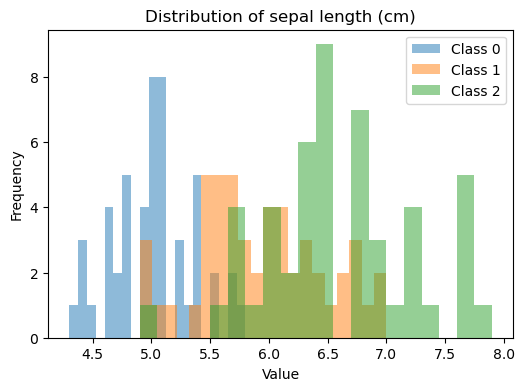

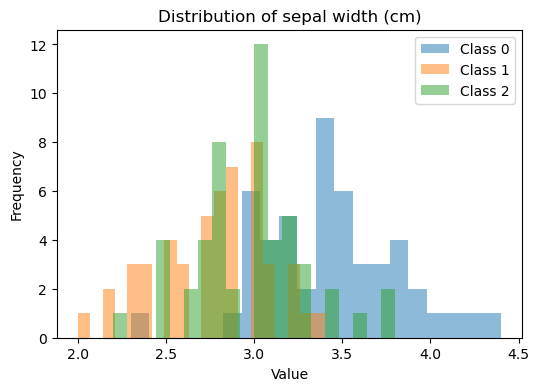

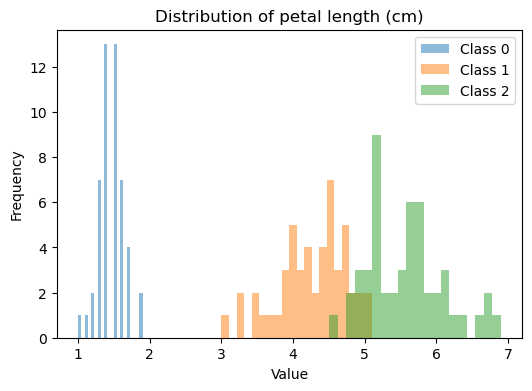

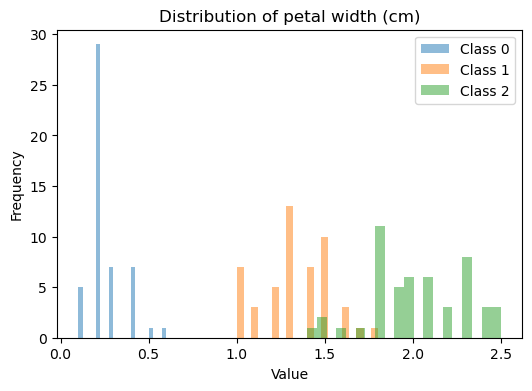

<Figure size 640x480 with 0 Axes>

In [98]:
# Распределение атрибутов реальных кластеров
for i in range(4):  # 4 признака
    plt.figure(figsize=(6, 4))
    for cluster in range(3):  # 3 кластера
        plt.hist(X[y == cluster, i], bins=20, alpha=0.5, label=f'Class {cluster}')
    plt.title(f'Distribution of {feature_names[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plt.tight_layout()
plt.show()

### Accurasy

In [102]:
from scipy.optimize import linear_sum_assignment

# Функция для сопоставления меток кластеров с истинными метками
def match_labels(true_labels, cluster_labels):
    # Создаем матрицу совпадений
    confusion_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(cluster_labels))), dtype=int)
    for true_label, cluster_label in zip(true_labels, cluster_labels):
        confusion_matrix[true_label, cluster_label] += 1

    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    return col_ind

In [103]:
# Функция для расчета accuracy после сопоставления меток
def calculate_accuracy(true_labels, cluster_labels):
    matched_labels = match_labels(true_labels, cluster_labels)
    predicted_labels = np.array([matched_labels[label] for label in cluster_labels])
    return accuracy_score(true_labels, predicted_labels)

In [104]:
# Расчет accuracy для каждого метода
kmeans_accuracy = calculate_accuracy(y, kmeans_labels)
agglo_accuracy = calculate_accuracy(y, agglo_labels)
dbscan_accuracy = calculate_accuracy(y, dbscan_labels)
spectral_accuracy = calculate_accuracy(y, spectral_labels)

metrics_table['Accuracy'] = [kmeans_accuracy, agglo_accuracy, dbscan_accuracy, spectral_accuracy]

print("Сравнение метрик кластеризации с Accuracy:")
print(metrics_table)

Сравнение метрик кластеризации с Accuracy:
                          Silhouette Score  Calinski-Harabasz Index  \
K-Means                           0.479881               157.360153   
Agglomerative Clustering          0.446689               222.719164   
DBSCAN                            0.356516                84.510330   
Spectral Clustering               0.462976               236.888875   

                          Davies-Bouldin Index  Adjusted Rand Index (ARI)  \
K-Means                               0.789363                   0.432805   
Agglomerative Clustering              0.803467                   0.615323   
DBSCAN                                7.124057                   0.442099   
Spectral Clustering                   0.825716                   0.645142   

                          Accuracy  
K-Means                   0.420000  
Agglomerative Clustering  0.160000  
DBSCAN                    0.680000  
Spectral Clustering       0.846667  


# Вывод

В данной работе были использованы различные методы кластеризации на наборе данных Iris. Мы рассмотрели четыре метода: K-Means, Agglomerative Clustering, DBSCAN и Spectral Clustering. Для каждого метода были рассчитаны метрики качества кластеризации, такие как Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index, Adjusted Rand Index (ARI) и Accuracy. На основе этих метрик был проведен анализ и сравнение методов.

Таким образом:
Spectral Clustering показывает наилучшие результаты по точности (84.67%) и соответствию истинным меткам (высокий ARI).